In [ ]:
from google.colab import drive


drive.mount('/content/gdrive')



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/trusk_case_study.xlsx', sheet_name='Base_de_donnée')


In [ ]:
df.iloc[0]
def isNaN(num):
    return num != num
df = df.dropna()
s = 0
for i in range(len(df)):

  if isNaN(df['fin_theorique_course'].iloc[i]) :
    #print(df['fin_theorique_course'].iloc[i])
    s = s + 1

s

0

In [ ]:
l = ['order_start_date','arrivee_theorique_course' ,'fin_theorique_course' ,'debut_creneau_magasin' ,
     'fin_creneau_magasin' ,'debut_creneau_client','fin_creneau_client' ,
     'arrivee_onfleet_magasin' ,'fin_onfleet_magasin' ,'arrivee_onfleet_client' ,'fin_onfleet_client', 'assigned_at']



def clean(date):
  date = str(date)
  return(date[0:10] + ' ' + date[11:-1])
clean('2020-09-19T10:41:09.724Z')

def convert_dates(df):
  for i in l:
    df[i] = df[i].apply(clean)
    df[i] = pd.to_datetime(df[i])
    print(i)
  return(df)

df = convert_dates(df)

df.dtypes

order_start_date
arrivee_theorique_course
fin_theorique_course
debut_creneau_magasin
fin_creneau_magasin
debut_creneau_client
fin_creneau_client
arrivee_onfleet_magasin
fin_onfleet_magasin
arrivee_onfleet_client
fin_onfleet_client
assigned_at


order_id                            object
hotspot                             object
trusk_customer                      object
date_de_la_course_bo        datetime64[ns]
order_start_date            datetime64[ns]
premiere_course                     object
heure                                int64
manut_magasin                        int64
manut_client                         int64
arrivee_theorique_course    datetime64[ns]
fin_theorique_course        datetime64[ns]
debut_creneau_magasin       datetime64[ns]
fin_creneau_magasin         datetime64[ns]
debut_creneau_client        datetime64[ns]
fin_creneau_client          datetime64[ns]
arrivee_onfleet_magasin     datetime64[ns]
fin_onfleet_magasin         datetime64[ns]
arrivee_onfleet_client      datetime64[ns]
fin_onfleet_client          datetime64[ns]
driver                              object
organisation                        object
allocator                           object
user_id                             object
assigned_at

In [ ]:
df.iloc[50]

order_id                                    abFP1v2vi_
hotspot                                      marseille
trusk_customer                              rJM9tGFm4G
date_de_la_course_bo               2020-09-24 12:00:00
order_start_date                   2020-09-24 10:00:00
premiere_course                                   FAUX
heure                                               12
manut_magasin                                       10
manut_client                                        10
arrivee_theorique_course           2020-09-24 11:00:00
fin_theorique_course               2020-09-24 11:10:32
debut_creneau_magasin              2020-09-24 10:00:00
fin_creneau_magasin                2020-09-24 12:00:00
debut_creneau_client               2020-09-24 11:00:00
fin_creneau_client                 2020-09-24 13:00:00
arrivee_onfleet_magasin     2020-09-24 13:26:57.897000
fin_onfleet_magasin         2020-09-24 13:39:10.774000
arrivee_onfleet_client      2020-09-24 15:44:27.708000
fin_onflee

In [ ]:
import datetime

df.iloc[0].arrivee_theorique_course

Timestamp('2020-09-19 09:45:00')

In [ ]:
import numpy as np
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds
def convert_to_minutes(t):
  return(t[0]*60 + t[1] + t[2]/60)

df['weekday'] = df.arrivee_theorique_course.apply(lambda x: x.weekday())
df['month'] = df.arrivee_theorique_course.apply(lambda x: x.month)
df['difference_arrivee_onfleet_magasin_debut_creneau_magasin'] = df['arrivee_onfleet_magasin'] - df['debut_creneau_magasin']
df['difference_arrivee_onfleet_magasin_debut_creneau_magasin'] = df['difference_arrivee_onfleet_magasin_debut_creneau_magasin'].apply(convert_timedelta)
df['avance_magasin'] = df['difference_arrivee_onfleet_magasin_debut_creneau_magasin'].apply(convert_to_minutes)
df['difference_arrivee_onfleet_magasin_fin_creneau_magasin'] = df['arrivee_onfleet_magasin'] - df['fin_creneau_magasin']
df['difference_arrivee_onfleet_magasin_fin_creneau_magasin'] = df['difference_arrivee_onfleet_magasin_fin_creneau_magasin'].apply(convert_timedelta)
df['retard_magasin'] = df['difference_arrivee_onfleet_magasin_fin_creneau_magasin'].apply(convert_to_minutes)


df['difference_arrivee_onfleet_client_debut_creneau_client'] = df['arrivee_onfleet_client'] - df['debut_creneau_client']
df['difference_arrivee_onfleet_client_debut_creneau_client'] = df['difference_arrivee_onfleet_client_debut_creneau_client'].apply(convert_timedelta)
df['avance_client'] = df['difference_arrivee_onfleet_client_debut_creneau_client'].apply(convert_to_minutes)
df['difference_arrivee_onfleet_client_fin_creneau_client'] = df['arrivee_onfleet_client'] - df['fin_creneau_client']
df['difference_arrivee_onfleet_client_fin_creneau_client'] = df['difference_arrivee_onfleet_client_fin_creneau_client'].apply(convert_timedelta)
df['retard_client'] = df['difference_arrivee_onfleet_client_fin_creneau_client'].apply(convert_to_minutes)

df['diff_assignation_start'] = df['debut_creneau_client'] - df['assigned_at']
df['diff_assignation_start'] = df['diff_assignation_start'].apply(convert_timedelta)
df['diff_assignation_start'] = df['diff_assignation_start'].apply(convert_to_minutes)

df['en_avance'] = (df['avance_client']<0).astype(int)
df['en_retard'] = (df['retard_client']> 0).astype(int)
df['on_time']  =  (df['en_avance']==0) & (df['en_retard']==0)
df['on_time']  = df['on_time'].astype(int)
df[df['avance_magasin'] < -1000]
df[df['avance_magasin'] < -1000][['avance_magasin','en_avance', 'difference_arrivee_onfleet_magasin_debut_creneau_magasin', 'arrivee_onfleet_magasin', 'debut_creneau_magasin']]

avance_magasin  en_avance  ... arrivee_onfleet_magasin debut_creneau_magasin
4636         -2761.3          1  ... 2020-10-14 11:58:42.333   2020-10-16 10:00:00
7572         -1464.5          1  ... 2020-10-29 10:50:30.924   2020-10-30 11:15:00
9987         -1413.1          1  ... 2020-11-06 09:26:54.177   2020-11-07 09:00:00

[3 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


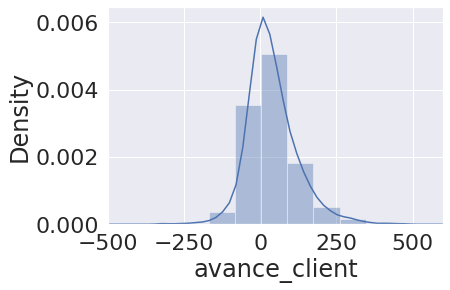

In [ ]:
import seaborn as sns
sns.set(font_scale=2)  # crazy big

import matplotlib.pyplot as plt
plt.xlim(-500,600)
sns.distplot(df['avance_client'])

In [ ]:
df_avance = df[df['avance_client']< 0 ]
df_retard = df[df['retard_client'] > 0]
#df_standard = pd.concat([df, pd.concat([df_avance, df_retard])]).drop_duplicates(keep=False)
df_standard = df[~df.apply(tuple,1).isin(pd.concat([df_avance, df_retard]).apply(tuple,1))]

print(len(df) - len(df_avance) - len(df_retard) - len(df_standard))

0


In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_hotspot(df,hotspot):
  ratio_avance = len(df[(df['hotspot'] == hotspot) & (df['en_avance'] == 1)]) / len(df[df['hotspot'] == hotspot])
  ratio_retard = len(df[(df['hotspot'] == hotspot) & (df['en_retard'] == 1)]) / len(df[df['hotspot'] == hotspot])
  ratio_on_time = len(df[(df['hotspot'] == hotspot) & (df['on_time'] == 1)]) / len(df[df['hotspot'] == hotspot])
  number_of_hotspots = len(df[df['hotspot'] == hotspot])
  return([hotspot,ratio_avance, ratio_retard, ratio_on_time, number_of_hotspots])

def create_hotspot_dataframe(df):
  hotspots = df['hotspot'].unique()
  l=[]
  for hotspot in hotspots:
    l.append(affect_ratio_hotspot(df,hotspot))
  return(pd.DataFrame(l, columns =['hotspot' , 'en avance', 'en retard' , 'on time', 'number of hotspots']))





plt.rcParams["figure.figsize"] = (15,5)

create_hotspot_dataframe(df).sort_values(['number of hotspots'],ascending=[False]).plot(x="hotspot", y=['en avance', 'en retard' , 'on time'], kind="bar")

len(df[df.hotspot == 'vannes'])
data_hotspot = create_hotspot_dataframe(df)

# contingency table

def table_test(data_hotspot):
  data = pd.DataFrame()   
  data['hotspot'] = data_hotspot['hotspot']
  data['en avance'] = data_hotspot['en avance'] * data_hotspot['number of hotspots']
  data['en retard'] = data_hotspot['en retard'] * data_hotspot['number of hotspots']
  data['on time'] = data_hotspot['on time'] * data_hotspot['number of hotspots']
  return(data)

table = table_test(data_hotspot)[['en avance' , 'en retard', 'on time']].values
print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.6f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_hotspot.sort_values(['number of hotspots'],ascending=[False]).applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

[[1.450e+02 4.700e+01 3.060e+02]
 [1.667e+03 6.500e+02 2.368e+03]
 [8.800e+01 6.300e+01 1.890e+02]
 [1.500e+02 1.080e+02 2.990e+02]
 [5.200e+01 2.000e+01 1.080e+02]
 [2.400e+01 1.200e+01 1.170e+02]
 [7.500e+01 2.600e+01 1.450e+02]
 [1.500e+01 1.800e+01 4.400e+01]
 [5.000e+00 2.000e+00 1.600e+01]
 [2.100e+01 4.000e+00 2.000e+01]
 [1.000e+00 0.000e+00 0.000e+00]]
dof=20
[[1.64146069e+02 6.95224100e+01 2.64331521e+02]
 [1.54422557e+03 6.54041146e+02 2.48673328e+03]
 [1.12067597e+02 4.74650992e+01 1.80467303e+02]
 [1.83593093e+02 7.77590007e+01 2.95647906e+02]
 [5.93299045e+01 2.51285819e+01 9.55415136e+01]
 [5.04304188e+01 2.13592946e+01 8.12102866e+01]
 [8.10842028e+01 3.43423953e+01 1.30573402e+02]
 [2.53800147e+01 1.07494489e+01 4.08705364e+01]
 [7.58104335e+00 3.21087436e+00 1.22080823e+01]
 [1.48324761e+01 6.28214548e+00 2.38853784e+01]
 [3.29610580e-01 1.39603233e-01 5.30786187e-01]]
probability=0.950, critical=31.410, stat=119.483
Dependent (reject H0)
significance=0.050, p=0.00000

hotspot en avance en retard on time  number of hotspots
1         paris    35.58%    13.87%  50.54%                4685
3      bordeaux    26.93%    19.39%  53.68%                 557
0      toulouse    29.12%     9.44%  61.45%                 498
2     marseille    25.88%    18.53%  55.59%                 340
6        nantes    30.49%    10.57%  58.94%                 246
4   montpellier    28.89%    11.11%  60.00%                 180
5    strasbourg    15.69%     7.84%  76.47%                 153
7          nice    19.48%    23.38%  57.14%                  77
9        vannes    46.67%     8.89%  44.44%                  45
8       avignon    21.74%     8.70%  69.57%                  23
10       toulon   100.00%     0.00%   0.00%                   1

[[1739.  690. 2299.]
 [ 504.  260. 1313.]]
dof=2
[[1558.39882439  660.04408523 2509.55709037]
 [ 684.60117561  289.95591477 1102.44290963]]
probability=0.950, critical=5.991, stat=130.908
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


premiere_course en avance en retard on time  number of premiere_courses
0            FAUX    36.78%    14.59%  48.63%                        4728
1            VRAI    24.27%    12.52%  63.22%                        2077

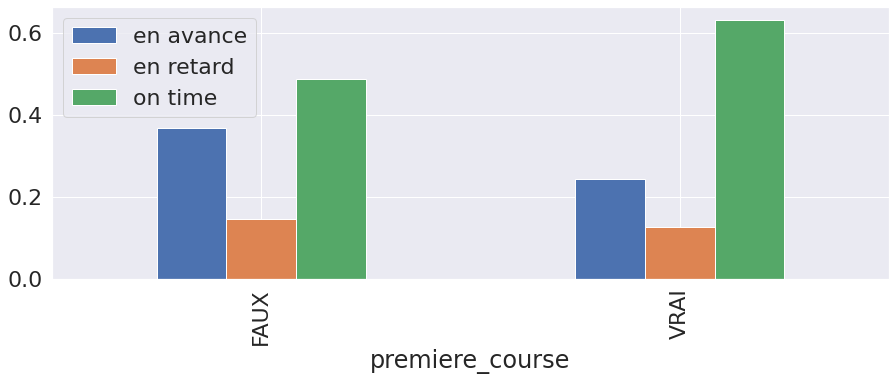

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_premiere_course(df,premiere_course):
  ratio_avance = len(df[(df['premiere_course'] == premiere_course) & (df['en_avance'] == 1)]) / len(df[df['premiere_course'] == premiere_course])
  ratio_retard = len(df[(df['premiere_course'] == premiere_course) & (df['en_retard'] == 1)]) / len(df[df['premiere_course'] == premiere_course])
  ratio_on_time = len(df[(df['premiere_course'] == premiere_course) & (df['on_time'] == 1)]) / len(df[df['premiere_course'] == premiere_course])
  number_of_premiere_courses = len(df[df['premiere_course'] == premiere_course])
  return([premiere_course,ratio_avance, ratio_retard, ratio_on_time, number_of_premiere_courses])

def create_premiere_course_dataframe(df):
  premiere_courses = df['premiere_course'].unique()
  l=[]
  for premiere_course in premiere_courses:
    l.append(affect_ratio_premiere_course(df,premiere_course))
  return(pd.DataFrame(l, columns =['premiere_course' , 'en avance', 'en retard' , 'on time', 'number of premiere_courses']))





plt.rcParams["figure.figsize"] = (15,5)

create_premiere_course_dataframe(df).plot(x="premiere_course", y=['en avance', 'en retard' , 'on time'], kind="bar")
data_premiere_course = create_premiere_course_dataframe(df)
def table_test(data_premiere_course):
  data = pd.DataFrame()   
  data['premiere_course'] = data_premiere_course['premiere_course']
  data['en avance'] = data_premiere_course['en avance'] * data_premiere_course['number of premiere_courses']
  data['en retard'] = data_premiere_course['en retard'] * data_premiere_course['number of premiere_courses']
  data['on time'] = data_premiere_course['on time'] * data_premiere_course['number of premiere_courses']
  return(data)

table = table_test(data_premiere_course)[['en avance' , 'en retard', 'on time']].values
print(table)

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

data_premiere_course.applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_driver(df,driver):
  ratio_avance = len(df[(df['driver'] == driver) & (df['en_avance'] == 1)]) / len(df[df['driver'] == driver])
  ratio_retard = len(df[(df['driver'] == driver) & (df['en_retard'] == 1)]) / len(df[df['driver'] == driver])
  ratio_on_time = len(df[(df['driver'] == driver) & (df['on_time'] == 1)]) / len(df[df['driver'] == driver])
  nombre_de_livraisons = len(df[df['driver'] == driver])
  return([driver,ratio_avance, ratio_retard, ratio_on_time, nombre_de_livraisons])

def create_driver_dataframe(df):
  drivers = df['driver'].unique()
  l=[]
  for driver in drivers:
    l.append(affect_ratio_driver(df,driver))
  return(pd.DataFrame(l, columns =['driver' , 'en avance', 'en retard' , 'on time','nombre de livraisons']))





plt.rcParams["figure.figsize"] = (15,5)

#create_driver_dataframe(df).head(30)
data_driver = create_driver_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False]).head(30)

data_driver.plot(x='driver', y=['en avance', 'en retard' , 'on time'], kind="bar")
# on peut repérer les drivers qui ne respectent pas les délais


# contingency table
data_driver = create_driver_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False])
def table_test(data_driver):
  data = pd.DataFrame()   
  data['driver'] = data_driver['driver']
  data['en avance'] = data_driver['en avance'] * data_driver['nombre de livraisons']
  data['en retard'] = data_driver['en retard'] * data_driver['nombre de livraisons']
  data['on time'] = data_driver['on time'] * data_driver['nombre de livraisons']
  return(data)

table = table_test(data_driver)[['en avance' , 'en retard', 'on time']].values
#print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_driver.head(30).applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

probability=0.950, critical=681.129, stat=1510.110
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


driver en avance en retard on time  nombre de livraisons
16      By7j7PePf    63.07%     2.84%  34.09%                   176
11      KF1M8gddT    26.77%    14.96%  58.27%                   127
24     -mblnj3PF1    25.00%    21.77%  53.23%                   124
36   iOyfNNyPifcK    25.41%    19.67%  54.92%                   122
37    E3vEOwwHodh    37.37%     9.09%  53.54%                    99
44       HJiKKU45    28.28%     6.06%  65.66%                    99
73      H1PZF4qif    40.22%     9.78%  50.00%                    92
63    kl6rah6CJbP    21.98%    29.67%  48.35%                    91
2       rkLNmvxwG    66.29%     0.00%  33.71%                    89
53    4fIUcl-pxS5    29.21%    14.61%  56.18%                    89
17    CXzT2d8R9_C    23.60%    21.35%  55.06%                    89
21    V0uKPqer1r8    37.93%     4.60%  57.47%                    87
138     Zaio_vTlZ    39.29%     9.52%  51.19%                    84
62     T2fdztcs4-    38.10%    11.90%  50.00%                    84
1      3st3P5ZLZ4    35.00%     7.50%  57.50%                    80
19      Skv4HJ2vl    25.32%    24.05%  50.63%                    79
119     ELbDMdSkL    28.95%    10.53%  60.53%                    76
76     rglzVA8lup    15.79%    23.68%  60.53%                    76
14     joQBh8PUdD    43.84%     9.59%  46.58%                    73
61     78eNWKjBmD    49.30%     7.04%  43.66%                    71
29      Bky_yUnCG    50.00%     5.88%  44.12%                    68
0     CRaRAVzN2fD    22.39%     4.48%  73.13%                    67
90    w8W-PpJov9w    13.64%    40.91%  45.45%                    66
79     YBSpHaRn8L    22.73%    16.67%  60.61%                    66
52     YulIUbm3YI    29.31%     6.90%  63.79%                    58
67       zJngw8aP    24.56%    29.82%  45.61%                    57
28    SNsdgGvoDZs    39.29%    10.71%  50.00%                    56
9      muwMlxCmAF    34.55%     3.64%  61.82%                    55
25     L9Wi9IeWdU    39.62%     9.43%  50.94%                    53
84      VJ2Lp3kVW    30.19%    13.21%  56.60%                    53

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'ax1 = df[df[\'driver\'] == \'By7j7PePf\'][\'allocator\'].value_counts().plot(kind=\'pie\',\n                                    figsize=(8,6),\n                                    title="Number for each Owner Name")\nax1.set_xlabel("Owner Names")\nax1.set_ylabel("Frequency")'

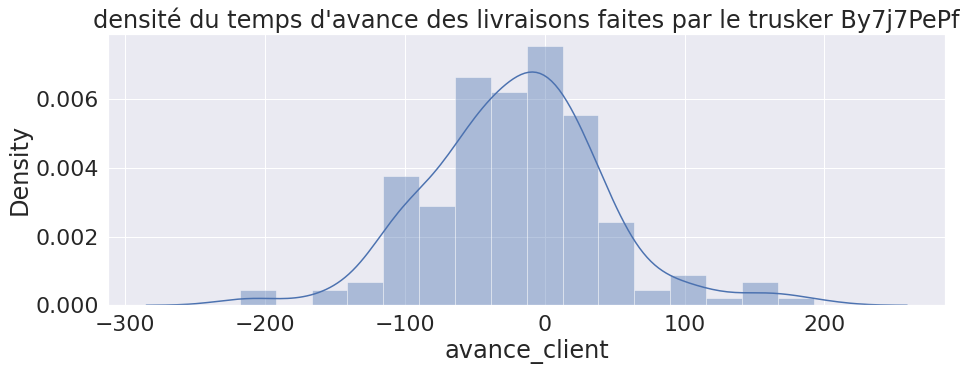

In [ ]:
import seaborn as sns
sns.distplot(df[df['driver'] == 'By7j7PePf']['avance_client'])
plt.title("densité du temps d'avance des livraisons faites par le trusker By7j7PePf")
'''ax1 = df[df['driver'] == 'By7j7PePf']['allocator'].value_counts().plot(kind='pie',
                                    figsize=(8,6),
                                    title="Number for each Owner Name")
ax1.set_xlabel("Owner Names")
ax1.set_ylabel("Frequency")'''

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array(['k25Jez7WP8'], dtype=object)

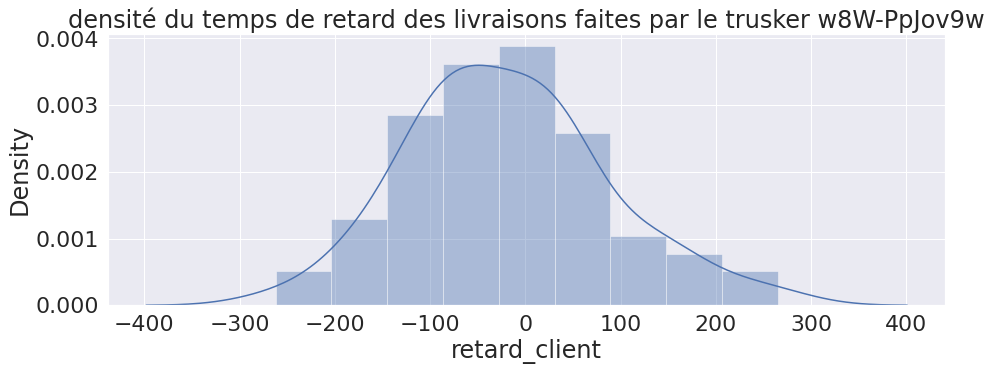

In [ ]:

sns.distplot(df[df['driver'] == 'w8W-PpJov9w']['retard_client'])
plt.title("densité du temps de retard des livraisons faites par le trusker w8W-PpJov9w")

df[df['driver'] == 'w8W-PpJov9w'].organisation.unique()

In [ ]:
ax = df_avance['hotspot'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_allocator(df,allocator):
  ratio_avance = len(df[(df['allocator'] == allocator) & (df['en_avance'] == 1)]) / len(df[df['allocator'] == allocator])
  ratio_retard = len(df[(df['allocator'] == allocator) & (df['en_retard'] == 1)]) / len(df[df['allocator'] == allocator])
  ratio_on_time = len(df[(df['allocator'] == allocator) & (df['on_time'] == 1)]) / len(df[df['allocator'] == allocator])
  number_of_allocations = len(df[df['allocator'] == allocator])
  return([allocator,ratio_avance, ratio_retard, ratio_on_time, number_of_allocations])

def create_allocator_dataframe(df):
  allocators = df['allocator'].unique()
  l=[]
  for allocator in allocators:
    l.append(affect_ratio_allocator(df,allocator))
  return(pd.DataFrame(l, columns =['allocator' , 'en avance', 'en retard' , 'on time', 'number of allocations']))





plt.rcParams["figure.figsize"] = (15,5)

#create_allocator_dataframe(df).plot(x="allocator", y=['en avance', 'en retard' , 'on time'], kind="bar")

create_allocator_dataframe(df).sort_values(['number of allocations'],ascending=[False]).head(20).plot(x='allocator', y=['en avance', 'en retard' , 'on time'], kind="bar")

data_allocator = create_allocator_dataframe(df)

# contingency table

def table_test(data_allocator):
  data = pd.DataFrame()   
  data['allocator'] = data_allocator['allocator']
  data['en avance'] = data_allocator['en avance'] * data_allocator['number of allocations']
  data['en retard'] = data_allocator['en retard'] * data_allocator['number of allocations']
  data['on time'] = data_allocator['on time'] * data_allocator['number of allocations']
  return(data)

table = table_test(data_allocator)[['en avance' , 'en retard', 'on time']].values
print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_allocator.sort_values(['number of allocations'],ascending=[False]).head(20).applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

[[1.980e+02 1.500e+02 3.140e+02]
 [9.980e+02 1.570e+02 1.339e+03]
 [2.900e+01 1.800e+01 5.700e+01]
 [5.600e+01 2.100e+01 7.700e+01]
 [1.800e+01 1.700e+01 8.500e+01]
 [1.210e+02 4.200e+01 1.830e+02]
 [1.150e+02 8.700e+01 2.100e+02]
 [1.940e+02 1.200e+02 3.780e+02]
 [1.700e+01 1.100e+01 3.300e+01]
 [1.540e+02 7.300e+01 2.130e+02]
 [1.250e+02 8.300e+01 1.970e+02]
 [8.000e+00 4.000e+00 1.300e+01]
 [4.200e+01 5.100e+01 1.110e+02]
 [1.300e+01 7.000e+00 5.300e+01]
 [1.400e+01 1.200e+01 3.500e+01]
 [2.600e+01 3.100e+01 7.200e+01]
 [2.000e+01 6.000e+00 5.600e+01]
 [1.200e+01 7.000e+00 3.800e+01]
 [8.000e+00 2.000e+00 5.000e+00]
 [2.000e+00 4.000e+00 1.200e+01]
 [4.000e+00 2.000e+00 5.000e+00]
 [1.400e+01 1.300e+01 3.700e+01]
 [3.000e+00 1.000e+00 1.100e+01]
 [8.000e+00 8.000e+00 2.100e+01]
 [7.000e+00 5.000e+00 9.000e+00]
 [6.000e+00 3.000e+00 1.000e+01]
 [0.000e+00 0.000e+00 1.000e+00]
 [8.000e+00 4.000e+00 1.500e+01]
 [3.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 2.000e+00]
 [0.000e+0

allocator en avance en retard on time  number of allocations
1   87iqy0DGIuf    40.02%     6.30%  53.69%                   2494
7    b8Euos3_WP    28.03%    17.34%  54.62%                    692
0    --4laKv-IA    29.91%    22.66%  47.43%                    662
9     q-IOr7U5D    35.00%    16.59%  48.41%                    440
6   _yi5IhHupZO    27.91%    21.12%  50.97%                    412
10  3l40WHuK0jG    30.86%    20.49%  48.64%                    405
5    dlUy-b3C64    34.97%    12.14%  52.89%                    346
12   a3-ft0JbYe    20.59%    25.00%  54.41%                    204
3    OaJXwOXmpZ    36.36%    13.64%  50.00%                    154
15   8UjvZk4S1M    20.16%    24.03%  55.81%                    129
4     SyWOj4pxX    15.00%    14.17%  70.83%                    120
2     ZHjPhw5_Z    27.88%    17.31%  54.81%                    104
16   J53L4HZhxW    24.39%     7.32%  68.29%                     82
13    BJ23PNH4G    17.81%     9.59%  72.60%                     73
21   UsKswWgEmu    21.88%    20.31%  57.81%                     64
14   BfbRuLLNrO    22.95%    19.67%  57.38%                     61
8     HkNvVA6-M    27.87%    18.03%  54.10%                     61
17    HJJ7vxmub    21.05%    12.28%  66.67%                     57
23    BJCPQGyOz    21.62%    21.62%  56.76%                     37
27    B1NT7deWM    29.63%    14.81%  55.56%                     27

In [ ]:
plt.xlim(-250,300)
plt.title("densité du temps d'avance de livraison pour l'allocator 87iqy0DGIuf")
sns.distplot(df[df['allocator'] == '87iqy0DGIuf']['avance_client'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


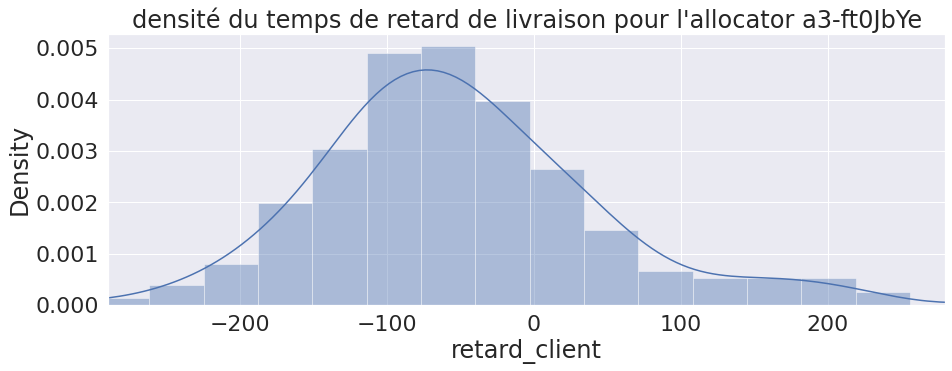

In [ ]:
plt.xlim(-290,280)
plt.title("densité du temps de retard de livraison pour l'allocator a3-ft0JbYe")
sns.distplot(df[df['allocator'] == 'a3-ft0JbYe']['retard_client'])

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_organisation(df,organisation):
  ratio_avance = len(df[(df['organisation'] == organisation) & (df['en_avance'] == 1)]) / len(df[df['organisation'] == organisation])
  ratio_retard = len(df[(df['organisation'] == organisation) & (df['en_retard'] == 1)]) / len(df[df['organisation'] == organisation])
  ratio_on_time = len(df[(df['organisation'] == organisation) & (df['on_time'] == 1)]) / len(df[df['organisation'] == organisation])
  nombre_de_livraisons = len(df[df['organisation'] == organisation])
  return([organisation,ratio_avance, ratio_retard, ratio_on_time, nombre_de_livraisons])

def create_organisation_dataframe(df):
  organisations = df['organisation'].unique()
  l=[]
  for organisation in organisations:
    l.append(affect_ratio_organisation(df,organisation))
  return(pd.DataFrame(l, columns =['organisation' , 'en avance', 'en retard' , 'on time','nombre de livraisons']))





plt.rcParams["figure.figsize"] = (15,5)

#create_organisation_dataframe(df).head(30)
data_organisation = create_organisation_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False]).head(25)

data_organisation.plot(x='organisation', y=['en avance', 'en retard' , 'on time'], kind="bar")
# on peut repérer les organisations qui ne respectent pas les délais


# contingency table
data_organisation = create_organisation_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False])
def table_test(data_organisation):
  data = pd.DataFrame()   
  data['organisation'] = data_organisation['organisation']
  data['en avance'] = data_organisation['en avance'] * data_organisation['nombre de livraisons']
  data['en retard'] = data_organisation['en retard'] * data_organisation['nombre de livraisons']
  data['on time'] = data_organisation['on time'] * data_organisation['nombre de livraisons']
  return(data)

table = table_test(data_organisation)[['en avance' , 'en retard', 'on time']].values
#print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_organisation.head(25).applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

#peut etre qu'il faut cibler les organisations qui ont les meilleures performances, il faut voir aussi si la ville a une influence sur ça

probability=0.950, critical=315.749, stat=964.809
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


organisation en avance en retard on time  nombre de livraisons
9      sXI79raPC    35.96%     9.87%  54.17%                   456
6       Hk0GVpFq    34.32%     7.84%  57.84%                   370
14     ryr9JUhRG    40.71%     8.93%  50.36%                   280
46     r1ZAz1u4x    28.11%    11.06%  60.83%                   217
16     BJ_1VwgDG    63.07%     2.84%  34.09%                   176
18     Ek-c0UBqg    26.67%    20.00%  53.33%                   150
32      g7YOxbBK    43.75%    11.81%  44.44%                   144
45     HJZgFdn-M    27.46%     8.45%  64.08%                   142
5     90QnqHUtq-    21.88%    10.94%  67.19%                   128
11     mCp0a3p2R    26.77%    14.96%  58.27%                   127
26    SMgGh6tRf2    19.35%    29.84%  50.81%                   124
22    rt-7jKmFOK    25.00%    21.77%  53.23%                   124
25    ITosvMd6x2    41.23%    13.16%  45.61%                   114
33     Ynn5NRY-v    28.28%     6.06%  65.66%                    99
2     aAewAyJC35    66.67%     0.00%  33.33%                    99
17    wPIslixrh1    23.96%    20.83%  55.21%                    96
80     cOW1eHXhp    27.96%    12.90%  59.14%                    93
61    2g0pTWvGqW    38.71%    11.83%  49.46%                    93
48    k25Jez7WP8    25.27%    29.67%  45.05%                    91
39   GsEkKX6KEwE    29.21%    14.61%  56.18%                    89
90    QqbUJshUla    39.29%     9.52%  51.19%                    84
44     lyxw62LVV    28.92%    15.66%  55.42%                    83
1     wBmxLcsSLu    35.00%     7.50%  57.50%                    80
49  3TsRD_N1EgZ5    31.25%    21.25%  47.50%                    80
59     SkdfH1-EZ    30.77%     6.41%  62.82%                    78

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_trusk_customer(df,trusk_customer):
  ratio_avance = len(df[(df['trusk_customer'] == trusk_customer) & (df['en_avance'] == 1)]) / len(df[df['trusk_customer'] == trusk_customer])
  ratio_retard = len(df[(df['trusk_customer'] == trusk_customer) & (df['en_retard'] == 1)]) / len(df[df['trusk_customer'] == trusk_customer])
  ratio_on_time = len(df[(df['trusk_customer'] == trusk_customer) & (df['on_time'] == 1)]) / len(df[df['trusk_customer'] == trusk_customer])
  nombre_de_livraisons = len(df[df['trusk_customer'] == trusk_customer])
  return([trusk_customer,ratio_avance, ratio_retard, ratio_on_time, nombre_de_livraisons])

def create_trusk_customer_dataframe(df):
  trusk_customers = df['trusk_customer'].unique()
  l=[]
  for trusk_customer in trusk_customers:
    l.append(affect_ratio_trusk_customer(df,trusk_customer))
  return(pd.DataFrame(l, columns =['trusk_customer' , 'en avance', 'en retard' , 'on time','nombre de livraisons']))





plt.rcParams["figure.figsize"] = (15,5)

#create_trusk_customer_dataframe(df).head(30)
data_trusk_customer = create_trusk_customer_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False]).head(25)

data_trusk_customer.plot(x='trusk_customer', y=['en avance', 'en retard' , 'on time'], kind="bar")
# on peut repérer les trusk_customers qui ne respectent pas les délais


# contingency table
data_trusk_customer = create_trusk_customer_dataframe(df).sort_values(['nombre de livraisons'],ascending=[False])
def table_test(data_trusk_customer):
  data = pd.DataFrame()   
  data['trusk_customer'] = data_trusk_customer['trusk_customer']
  data['en avance'] = data_trusk_customer['en avance'] * data_trusk_customer['nombre de livraisons']
  data['en retard'] = data_trusk_customer['en retard'] * data_trusk_customer['nombre de livraisons']
  data['on time'] = data_trusk_customer['on time'] * data_trusk_customer['nombre de livraisons']
  return(data)

table = table_test(data_trusk_customer)[['en avance' , 'en retard', 'on time']].values
#print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_trusk_customer.head(25).applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

#peut etre qu'il faut cibler les trusk_customers qui ont les meilleures performances, il faut voir aussi si la ville a une influence sur ça

probability=0.950, critical=255.602, stat=611.901
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


trusk_customer en avance en retard on time  nombre de livraisons
17     rJmzgP4lNf    25.39%    21.36%  53.25%                   323
2      SygI3Q-0pM    28.08%    18.08%  53.85%                   260
28     BkWRGD4xNz    37.36%    13.74%  48.90%                   182
40     SkZuIINlVz    33.15%    12.71%  54.14%                   181
41     p1FdPwSNe8    31.28%     8.94%  59.78%                   179
12     SJbHZUNx4M    62.36%     3.93%  33.71%                   178
3       B1YLT6Hnz    55.62%     7.69%  36.69%                   169
15     H1eIfmpNpM    33.14%    17.16%  49.70%                   169
6      rJbvoBNeNf    29.76%    19.64%  50.60%                   168
26     SJxXxLVl4f    23.35%    18.56%  58.08%                   167
29     H1BncLVeNz    28.76%     7.84%  63.40%                   153
79     B1zvoBNlNz    38.16%     6.58%  55.26%                   152
0      S1PfOPEg4f    32.87%     9.79%  57.34%                   143
16     u2SXzvD9zE    25.19%    12.98%  61.83%                   131
34     r1bENUVxEf    44.72%     9.76%  45.53%                   123
1      GFkT4_FFYz    37.70%     6.56%  55.74%                   122
13     r1ZzkM1-QQ    36.97%     6.72%  56.30%                   119
31     4I3j8ii0PK    30.10%     9.71%  60.19%                   103
45     S1ZzODEgNf    37.89%     9.47%  52.63%                    95
20     H1QoiI4l4M    30.11%    27.96%  41.94%                    93
64     ryfmUwNlVz    39.78%    19.35%  40.86%                    93
24     SylfudsVV7    35.48%    15.05%  49.46%                    93
43     rJgT6h_iXm    36.26%    16.48%  47.25%                    91
22     rylmFvVx4M    15.38%    20.88%  63.74%                    91
4      H1gOCBNl4f    41.76%     5.49%  52.75%                    91

In [ ]:
df[df['organisation'] == 'BJ_1VwgDG']['driver'].unique()

#ce driver a le plus grand taux d'avance, ainsi que son organisation (il est le seul chauffeur de son organisation)

array(['By7j7PePf'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

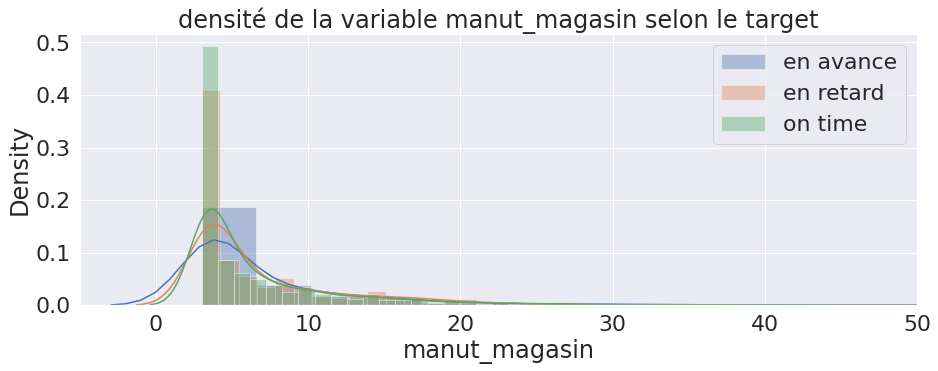

In [ ]:
sns.set(font_scale=2) 

plt.xlim(-5,50)

sns.distplot(df[df['en_avance'] == 1]['manut_magasin'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['manut_magasin'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['manut_magasin'], label = 'on time')
plt.legend()
plt.title("densité de la variable manut_magasin selon le target")
plt.show()

In [ ]:
plt.xlim(-5,50)
sns.distplot(df[df['en_avance'] == 1]['manut_client'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['manut_client'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['manut_client'], label = 'on time')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
plt.xlim(7,12)
sns.distplot(df[df['en_avance'] == 1]['month'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['month'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['month'], label = 'on time')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
plt.xlim(0,7)
sns.distplot(df[df['en_avance'] == 1]['weekday'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['weekday'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['weekday'], label = 'on time')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
plt.xlim(4,20)
sns.distplot(df[df['en_avance'] == 1]['heure'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['heure'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['heure'], label = 'on time')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

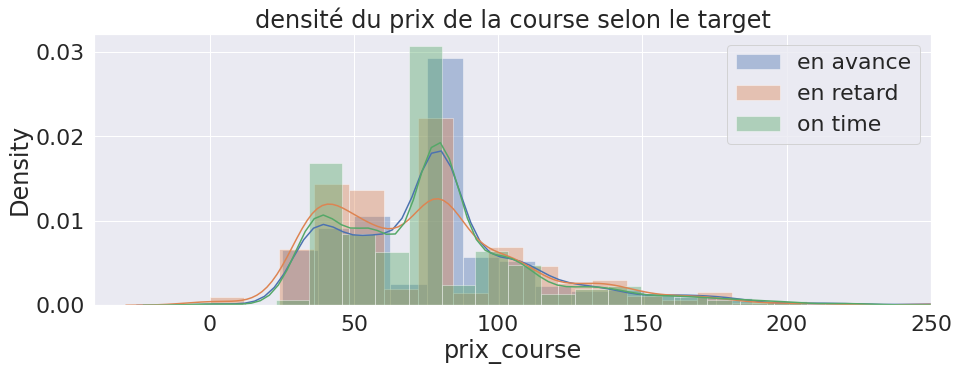

In [ ]:
plt.xlim(-40,250)
sns.distplot(df[df['en_avance'] == 1]['prix_course'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['prix_course'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['prix_course'], label = 'on time')
plt.title("densité du prix de la course selon le target")

plt.legend()

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

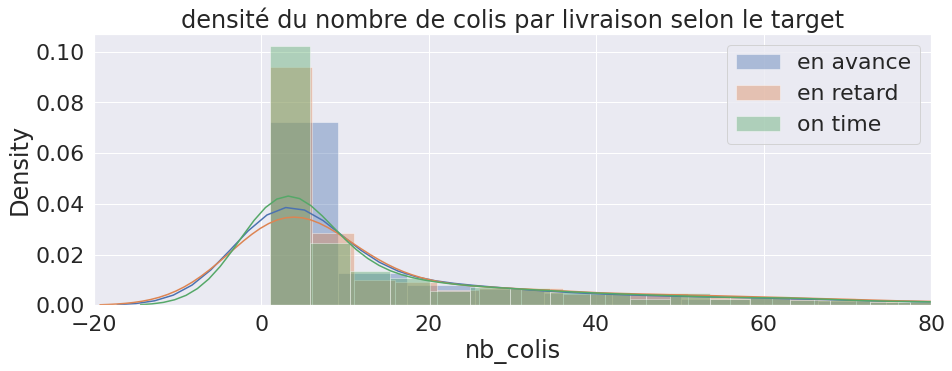

In [ ]:
plt.xlim(-20,80)
sns.distplot(df[df['en_avance'] == 1]['nb_colis'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['nb_colis'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['nb_colis'], label = 'on time')
plt.legend()
plt.title("densité du nombre de colis par livraison selon le target")
plt.show()

probability=0.950, critical=41.337, stat=533.819
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


heure en avance en retard on time  nombre de livraisons
13      6     0.00%    50.00%  50.00%                     4
6       7    11.46%    18.06%  70.49%                   515
2       8    20.62%    18.87%  60.51%                   975
4       9    22.60%    18.44%  58.97%                  1394
3      10    30.86%    14.84%  54.30%                   768
0      11    38.11%    12.02%  49.87%                   391
8      12    44.16%     9.98%  45.86%                   471
5      13    43.99%     8.68%  47.34%                   657
7      14    42.62%    10.98%  46.39%                   610
10     15    50.85%    10.17%  38.98%                   413
9      16    51.71%     8.56%  39.73%                   292
1      17    50.42%     4.62%  44.96%                   238
11     18    58.21%     4.48%  37.31%                    67
12     19    50.00%     0.00%  50.00%                     8
14     20    50.00%    50.00%   0.00%                     2

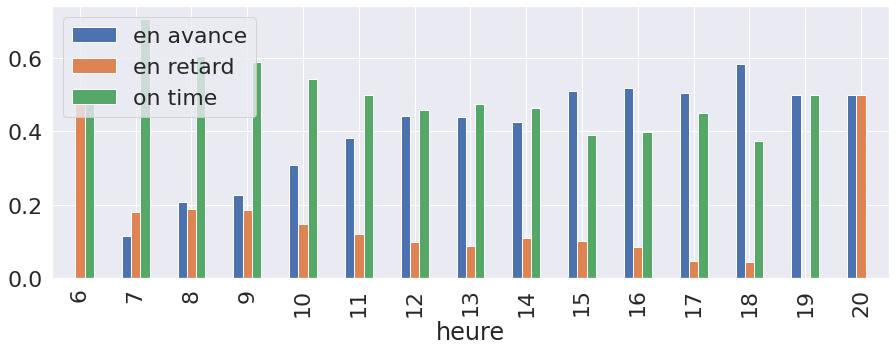

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_heure(df,heure):
  ratio_avance = len(df[(df['heure'] == heure) & (df['en_avance'] == 1)]) / len(df[df['heure'] == heure])
  ratio_retard = len(df[(df['heure'] == heure) & (df['en_retard'] == 1)]) / len(df[df['heure'] == heure])
  ratio_on_time = len(df[(df['heure'] == heure) & (df['on_time'] == 1)]) / len(df[df['heure'] == heure])
  nombre_de_livraisons = len(df[df['heure'] == heure])
  return([heure,ratio_avance, ratio_retard, ratio_on_time, nombre_de_livraisons])

def create_heure_dataframe(df):
  heures = df['heure'].unique()
  l=[]
  for heure in heures:
    l.append(affect_ratio_heure(df,heure))
  return(pd.DataFrame(l, columns =['heure' , 'en avance', 'en retard' , 'on time','nombre de livraisons']))





plt.rcParams["figure.figsize"] = (15,5)

#create_heure_dataframe(df).head(30)
data_heure = create_heure_dataframe(df).sort_values(['heure'],ascending=[True])

data_heure.plot(x='heure', y=['en avance', 'en retard' , 'on time'], kind="bar")
# on peut repérer les heures qui ne respectent pas les délais


# contingency table
def table_test(data_heure):
  data = pd.DataFrame()   
  data['heure'] = data_heure['heure']
  data['en avance'] = data_heure['en avance'] * data_heure['nombre de livraisons']
  data['en retard'] = data_heure['en retard'] * data_heure['nombre de livraisons']
  data['on time'] = data_heure['on time'] * data_heure['nombre de livraisons']
  return(data)

table = table_test(data_heure)[['en avance' , 'en retard', 'on time']].values
#print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_heure.applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

probability=1.000, critical=34.821, stat=38.631
Dependent (reject H0)
significance=0.0005, p=0.000121020
Dependent (reject H0)


weekday en avance en retard on time  nombre de livraisons
2        0    32.58%    14.76%  52.67%                  1369
1        1    30.66%    13.57%  55.77%                  1083
3        2    34.41%    14.46%  51.13%                  1148
5        3    32.87%    14.43%  52.70%                  1074
4        4    31.68%    12.40%  55.92%                  1089
0        5    33.61%    16.45%  49.94%                   833
6        6    44.02%     3.83%  52.15%                   209

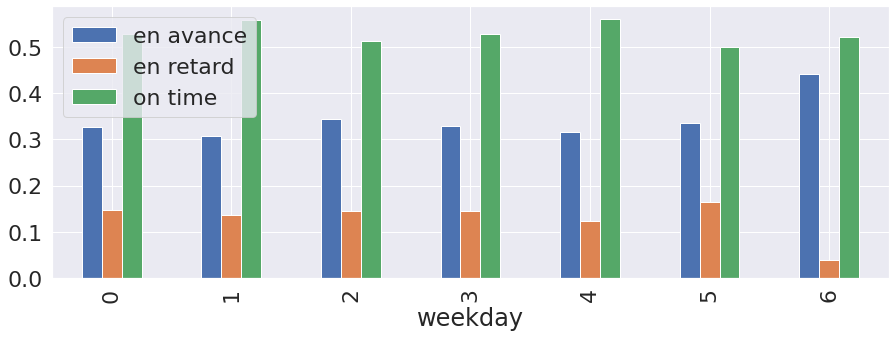

In [ ]:
import matplotlib.pyplot as plt

def affect_ratio_weekday(df,weekday):
  ratio_avance = len(df[(df['weekday'] == weekday) & (df['en_avance'] == 1)]) / len(df[df['weekday'] == weekday])
  ratio_retard = len(df[(df['weekday'] == weekday) & (df['en_retard'] == 1)]) / len(df[df['weekday'] == weekday])
  ratio_on_time = len(df[(df['weekday'] == weekday) & (df['on_time'] == 1)]) / len(df[df['weekday'] == weekday])
  nombre_de_livraisons = len(df[df['weekday'] == weekday])
  return([weekday,ratio_avance, ratio_retard, ratio_on_time, nombre_de_livraisons])

def create_weekday_dataframe(df):
  weekdays = df['weekday'].unique()
  l=[]
  for weekday in weekdays:
    l.append(affect_ratio_weekday(df,weekday))
  return(pd.DataFrame(l, columns =['weekday' , 'en avance', 'en retard' , 'on time','nombre de livraisons']))





plt.rcParams["figure.figsize"] = (15,5)

#create_weekday_dataframe(df).head(30)
data_weekday = create_weekday_dataframe(df).sort_values(['weekday'],ascending=[True])

data_weekday.plot(x='weekday', y=['en avance', 'en retard' , 'on time'], kind="bar")
# on peut repérer les weekdays qui ne respectent pas les délais


# contingency table
def table_test(data_weekday):
  data = pd.DataFrame()   
  data['weekday'] = data_weekday['weekday']
  data['en avance'] = data_weekday['en avance'] * data_weekday['nombre de livraisons']
  data['en retard'] = data_weekday['en retard'] * data_weekday['nombre de livraisons']
  data['on time'] = data_weekday['on time'] * data_weekday['nombre de livraisons']
  return(data)

table = table_test(data_weekday)[['en avance' , 'en retard', 'on time']].values
#print(table)

from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.9995
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.4f, p=%.9f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
data_weekday.applymap(lambda x:  "{:.2%}".format(float(x)) if isinstance(x, float) else x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

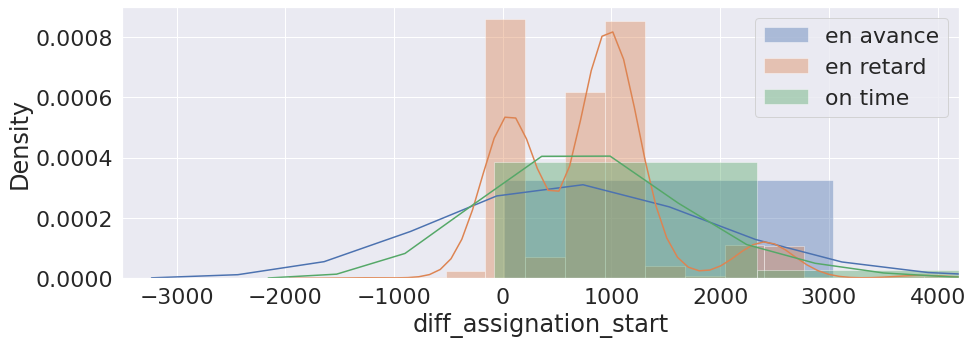

In [ ]:
plt.xlim(-3500,4200)
sns.distplot(df[df['en_avance'] == 1]['diff_assignation_start'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['diff_assignation_start'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['diff_assignation_start'], label = 'on time')
plt.legend()

plt.show()


#df[(df['on_time'] == 1) & (df['diff_assignation_start'] < 5)]
#une grande partie des orders ont été affecté juste avant lé début de la livraison

In [ ]:
sns.set(font_scale=1) 

sns.heatmap(df.corr('spearman'), annot=True)
plt.show()


In [ ]:
plt.xlim(0,24)
sns.distplot(df[df['en_avance'] == 1]['heure'], label= 'en avance')
sns.distplot(df[df['en_retard'] == 1]['heure'], label = 'en retard')
sns.distplot(df[df['on_time'] == 1]['heure'], label = 'on time')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
df.columns 
data_avance = df[(df['en_avance'] == 1 )  |  (df['on_time'] == 1 )]
data_avance['hotspot'] = pd.factorize(data_avance['hotspot'])[0]

data_avance['trusk_customer'] = pd.factorize(data_avance['trusk_customer'])[0]


data_avance['premiere_course'] = pd.factorize(data_avance['premiere_course'])[0]

data_avance['driver'] = pd.factorize(data_avance['driver'])[0]

data_avance['organisation'] = pd.factorize(data_avance['organisation'])[0]

data_avance['allocator'] = pd.factorize(data_avance['allocator'])[0]

data_avance['user_id'] = pd.factorize(data_avance['user_id'])[0]

X = data_avance[['hotspot', 'trusk_customer', 'premiere_course', 'heure', 'manut_magasin','manut_client',
        'driver','organisation', 'allocator', 'user_id','nb_colis','prix_course', 'weekday', 'weekday',
      'diff_assignation_start']]
conditions = [
    (data_avance['en_avance'] == 1),
    (data_avance['on_time'] == 1)]
choices = [0, 1]
data_avance['class'] = np.select(conditions, choices)
y = data_avance['class']

X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

(5855, 15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf =  RandomForestClassifier(n_estimators = 1500,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)
rf.fit(X, y) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
%pip install rfpimp


     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10261 sha256=75f4a948826ab76fa4bde4eb3dfb9c25536c9678c98312e1cc722f40c8dd3ce7
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.5-cp36-none-any.whl size=35033 sha256=b1671abdf99f321ccb141051ed0deb1f43b5900ffe0f6ce7ed25e14eed957612
  Stored in directory: /root/.cache/pip/wheels/6e/28/de/a84563cfe761afd6c628e595590455412e26a6c4d587289d7b
Successfully built rfpimp stratx


In [ ]:

from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X, y, r2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
r2(rf, X, y)

1.0

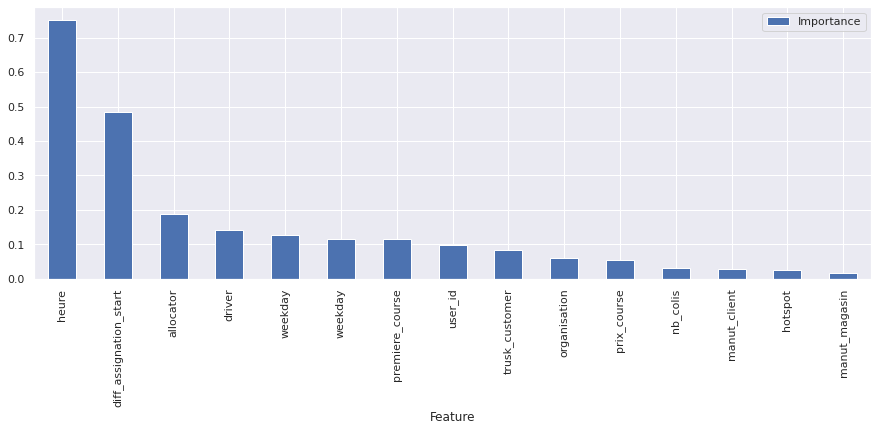

In [ ]:
perm_imp_rfpimp.plot.bar()

In [ ]:
df.columns 
data_retard = df[(df['en_retard'] == 1 )  |  (df['on_time'] == 1 )]
data_retard['hotspot'] = pd.factorize(data_retard['hotspot'])[0]

data_retard['trusk_customer'] = pd.factorize(data_retard['trusk_customer'])[0]


data_retard['premiere_course'] = pd.factorize(data_retard['premiere_course'])[0]

data_retard['driver'] = pd.factorize(data_retard['driver'])[0]

data_retard['organisation'] = pd.factorize(data_retard['organisation'])[0]

data_retard['allocator'] = pd.factorize(data_retard['allocator'])[0]

data_retard['user_id'] = pd.factorize(data_retard['user_id'])[0]

X1 = data_retard[['hotspot', 'trusk_customer', 'premiere_course', 'heure', 'manut_magasin','manut_client',
        'driver','organisation', 'allocator', 'user_id','nb_colis','prix_course', 'weekday', 'month',
      'diff_assignation_start']]
conditions = [
    (data_retard['en_retard'] == 1),
    (data_retard['on_time'] == 1)]
choices = [0, 1]
data_retard['class'] = np.select(conditions, choices)
y1 = data_retard['class']

X1.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

(4562, 15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf1 =  RandomForestClassifier(n_estimators = 1500,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)
rf1.fit(X1, y1)

perm_imp_rfpimp1 = permutation_importances(rf1, X1, y1, r2)

In [ ]:
r2(rf1, X1, y1)

0.9986705134930349

In [ ]:
perm_imp_rfpimp1

Importance
Feature                           
allocator                 0.639483
diff_assignation_start    0.507864
heure                     0.372256
organisation              0.343008
driver                    0.299134
premiere_course           0.292487
user_id                   0.199423
prix_course               0.191446
trusk_customer            0.167515
nb_colis                  0.116995
manut_client              0.106359
weekday                   0.086417
month                     0.039885
hotspot                   0.034567
manut_magasin             0.026590

In [ ]:
perm_imp_rfpimp1.plot.bar()

In [ ]:
d = {"en avance" : len(df[df['en_avance'] == 1]),
     "en retard": len(df[df['en_retard'] == 1]),
     "on time" : len(df[df['on_time'] == 1])}

# Get the Keys and store them in a list
labels = list(d.keys())

# Get the Values and store them in a list
values = list(d.values())
plt.pie(values, labels=labels)
plt.show()

d

{'en avance': 2243, 'en retard': 950, 'on time': 3612}

In [ ]:
ax = df_avance['allocator'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

In [ ]:
ax = df['allocator'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

In [ ]:
import matplotlib.pyplot as plt

plt.xlim(-180, 250)
sns.distplot(df['avance_client'])
sns.distplot(df_avance['avance_client'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Pq on livre un colis un jour ou plus avant le début du créneau?

Regarder si le jour de la semaine a une influence